# Load data

In [504]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [505]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from itertools import cycle

import warnings
warnings.filterwarnings('ignore')

Read data

In [506]:
fpt = pd.read_csv('/content/drive/MyDrive/stock_price_prediction/FPT.csv')
msn = pd.read_csv('/content/drive/MyDrive/stock_price_prediction/MSN.csv')
pnj = pd.read_csv('/content/drive/MyDrive/stock_price_prediction/PNJ.csv')
vic = pd.read_csv('/content/drive/MyDrive/stock_price_prediction/VIC.csv')

# Exploratory data

Explore data

In [507]:
print("FPT\n",fpt)
print("MSN\n",msn)
print("PNJ\n",pnj)
print("VIC\n",vic)

FPT
       Ticker         Date/Time   Open   High    Low  Close  Volume  \
0        FPT   12/25/2018 9:15  30.89  30.89  30.89  30.89   35410   
1        FPT   12/25/2018 9:16  30.81  30.81  30.81  30.81     190   
2        FPT   12/25/2018 9:17  30.74  30.81  30.74  30.74    1120   
3        FPT   12/25/2018 9:18  30.74  30.74  30.74  30.74    2120   
4        FPT   12/25/2018 9:19  30.74  30.74  30.74  30.74   22500   
...      ...               ...    ...    ...    ...    ...     ...   
97401    FPT  12/22/2020 14:24  58.20  58.20  58.20  58.20   27470   
97402    FPT  12/22/2020 14:25  58.20  58.20  58.20  58.20   14820   
97403    FPT  12/22/2020 14:26  58.20  58.20  58.20  58.20     500   
97404    FPT  12/22/2020 14:29  58.10  58.10  58.10  58.10    2500   
97405    FPT  12/22/2020 14:46  58.10  58.10  58.10  58.10   11170   

       Open Interest  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...             

In [508]:
print("(FPT) \n", fpt.info())
print("(MSN) \n",msn.info())
print("(PNJ) \n",pnj.info())
print("(VIC) \n",vic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Date/Time      97406 non-null  object 
 2   Open           97406 non-null  float64
 3   High           97406 non-null  float64
 4   Low            97406 non-null  float64
 5   Close          97406 non-null  float64
 6   Volume         97406 non-null  int64  
 7   Open Interest  97406 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.9+ MB
(FPT) 
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135354 entries, 0 to 135353
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         135354 non-null  object 
 1   Date/Time      135354 non-null  object 
 2   Open           135354 non-null  float64
 3   High           135354 non-null  float

Statistics data

In [509]:
fpt.describe()

,Open,High,Low,Close,Volume,Open Interest
count,97406.000000,97406.000000,97406.000000,97406.000000,9.740600e+04,97406.0
mean,45.071630,45.090138,45.051430,45.071631,8.044173e+03,0.0
std,6.359803,6.364950,6.354245,6.359799,1.753203e+04,0.0
min,30.250000,30.250000,30.220000,30.250000,1.000000e+01,0.0
25%,39.740000,39.740000,39.700000,39.740000,7.500000e+02,0.0
50%,46.950000,46.950000,46.950000,46.950000,2.960000e+03,0.0
75%,49.200000,49.250000,49.170000,49.200000,8.960000e+03,0.0
max,58.400000,58.500000,58.400000,58.400000,1.255930e+06,0.0


In [510]:
msn.describe()

,Open,High,Low,Close,Volume,Open Interest
count,135354.000000,135354.000000,135354.000000,135354.000000,1.353540e+05,135354.0
mean,74.878809,74.931668,74.834625,74.880759,5.683578e+03,0.0
std,15.418074,15.426954,15.412677,15.418857,2.798513e+04,0.0
min,46.500000,46.500000,46.400000,46.400000,1.000000e+01,0.0
25%,57.900000,57.900000,57.800000,57.800000,5.000000e+02,0.0
50%,79.100000,79.200000,79.100000,79.100000,2.000000e+03,0.0
75%,86.000000,86.100000,86.000000,86.000000,5.560000e+03,0.0
max,117.800000,118.000000,117.700000,118.000000,3.300680e+06,0.0


In [511]:
pnj.describe()

,Open,High,Low,Close,Volume,Open Interest
count,125309.000000,125309.000000,125309.000000,125309.000000,125309.000000,125309.0
mean,72.182052,72.372590,72.042287,72.179371,3031.830451,0.0
std,9.900263,9.995786,9.830847,9.899401,7248.952968,0.0
min,44.430000,44.530000,44.040000,44.140000,1.000000,0.0
25%,64.600000,64.700000,64.570000,64.600000,220.000000,0.0
50%,72.800000,73.010000,72.640000,72.830000,1000.000000,0.0
75%,80.160000,80.350000,80.060000,80.160000,3130.000000,0.0
max,100.160000,100.160000,100.160000,100.160000,580730.000000,0.0


In [512]:
vic.describe()

,Open,High,Low,Close,Volume,Open Interest
count,101266.000000,101266.000000,101266.000000,101266.000000,1.012660e+05,101266.0
mean,105.376460,105.418519,105.334147,105.378791,3.182640e+03,0.0
std,11.543158,11.535584,11.552338,11.545054,1.469814e+04,0.0
min,68.000000,68.000000,68.000000,68.000000,1.000000e+01,0.0
25%,95.400000,95.400000,95.300000,95.400000,2.300000e+02,0.0
50%,105.300000,105.300000,105.200000,105.300000,1.020000e+03,0.0
75%,115.800000,115.900000,115.800000,115.800000,3.000000e+03,0.0
max,126.100000,126.500000,126.100000,126.500000,1.468390e+06,0.0


Check null

In [513]:
print("FPT\n",fpt.isnull().sum())
print("\nMSN\n",msn.isnull().sum())
print("\nPNJ\n",pnj.isnull().sum())
print("\nVIC\n",vic.isnull().sum())

FPT
 Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
dtype: int64

MSN
 Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
dtype: int64

PNJ
 Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
dtype: int64

VIC
 Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
dtype: int64


Remove unrelated columns

In [514]:
fpt = fpt.drop(columns=['Ticker','Open Interest'])
msn = msn.drop(columns=['Ticker','Open Interest'])
pnj = pnj.drop(columns=['Ticker','Open Interest'])
vic = vic.drop(columns=['Ticker','Open Interest'])

fpt_eda = fpt.copy()
msn_eda = msn.copy()
pnj_eda = pnj.copy()
vic_eda = vic.copy()

Convert to date and group by date

In [515]:
fpt_eda['Date/Time'] = pd.to_datetime(fpt_eda['Date/Time']).apply(lambda x: x.date())
msn_eda['Date/Time'] = pd.to_datetime(msn_eda['Date/Time']).apply(lambda x: x.date())
pnj_eda['Date/Time'] = pd.to_datetime(pnj_eda['Date/Time']).apply(lambda x: x.date())
vic_eda['Date/Time'] = pd.to_datetime(vic_eda['Date/Time']).apply(lambda x: x.date())


In [516]:
#Nhóm giá trị của các cổ phiếu lại theo ngày
def group_stocks_by_day(stock):
  stock =  stock.groupby("Date/Time").agg(
    Open = ('Open', 'first'),
    High = ('High', 'max'),
    Low = ('Low', 'min'),
    Close = ('Close', 'last'),
    Volume = ('Volume', 'sum')
  )
  return stock

fpt_eda = group_stocks_by_day(fpt_eda)
msn_eda = group_stocks_by_day(msn_eda)
pnj_eda = group_stocks_by_day(pnj_eda)
vic_eda = group_stocks_by_day(vic_eda)

In [517]:
print("FPT\n",fpt_eda)
print("MSN\n",msn_eda)
print("PNJ\n",pnj_eda)
print("VIC\n",vic_eda)

FPT
              Open   High    Low  Close   Volume
Date/Time                                      
2018-12-25  30.89  30.89  30.59  30.66    84960
2018-12-26  31.04  31.22  30.89  30.89   333590
2018-12-27  31.41  31.52  31.19  31.19   454860
2018-12-28  31.34  31.49  31.19  31.49   387170
2019-01-02  31.19  31.45  30.70  30.74   459120
...           ...    ...    ...    ...      ...
2020-12-16  57.20  57.50  57.00  57.10  1995530
2020-12-17  56.90  57.00  56.00  56.50  3594500
2020-12-18  56.50  57.00  56.50  56.90  1532820
2020-12-21  57.30  57.80  57.10  57.50  2307390
2020-12-22  57.40  58.50  57.20  58.10  2576390

[499 rows x 5 columns]
MSN
              Open  High    Low  Close   Volume
Date/Time                                     
2017-12-25  73.10  75.4  73.00   74.2   207370
2017-12-26  74.90  75.5  74.30   75.5   403710
2017-12-27  74.90  75.7  74.80   75.0   517920
2017-12-28  75.00  76.0  74.50   75.7   377030
2017-12-29  76.00  77.0  76.00   76.7   226880
...          

In [518]:
fig = make_subplots(rows=4, cols=1,subplot_titles=('Open','High','Low','Close'))

# Open
fig.add_trace(go.Line(x=fpt.index, y=fpt['Open']), row=1, col=1)

# High
fig.add_trace(go.Line(x=fpt.index, y=fpt['High']), row=2, col=1)

# Low
fig.add_trace(go.Line(x=fpt.index, y=fpt['Low']), row=3, col=1)

# Close
fig.add_trace(go.Line(x=fpt.index, y=fpt['Close']), row=4, col=1)

fig.update_layout(height=1400, width=1000, title_text="OHLC Line Plots")

fig.show()

Output hidden; open in https://colab.research.google.com to view.

Detecting trend, seasonality, and residuals

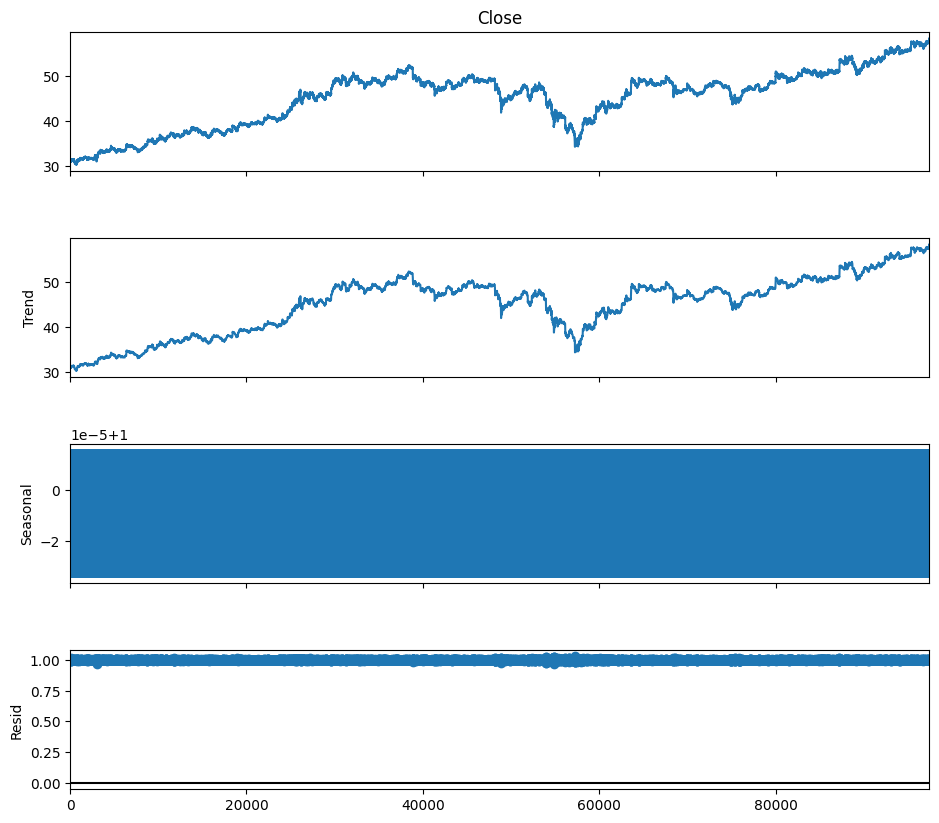

In [519]:
decomposition_multi = seasonal_decompose(fpt['Close'], model='multiplicative', period = 12)
fig = decomposition_multi.plot()
fig.set_size_inches((10, 9))
plt.show()

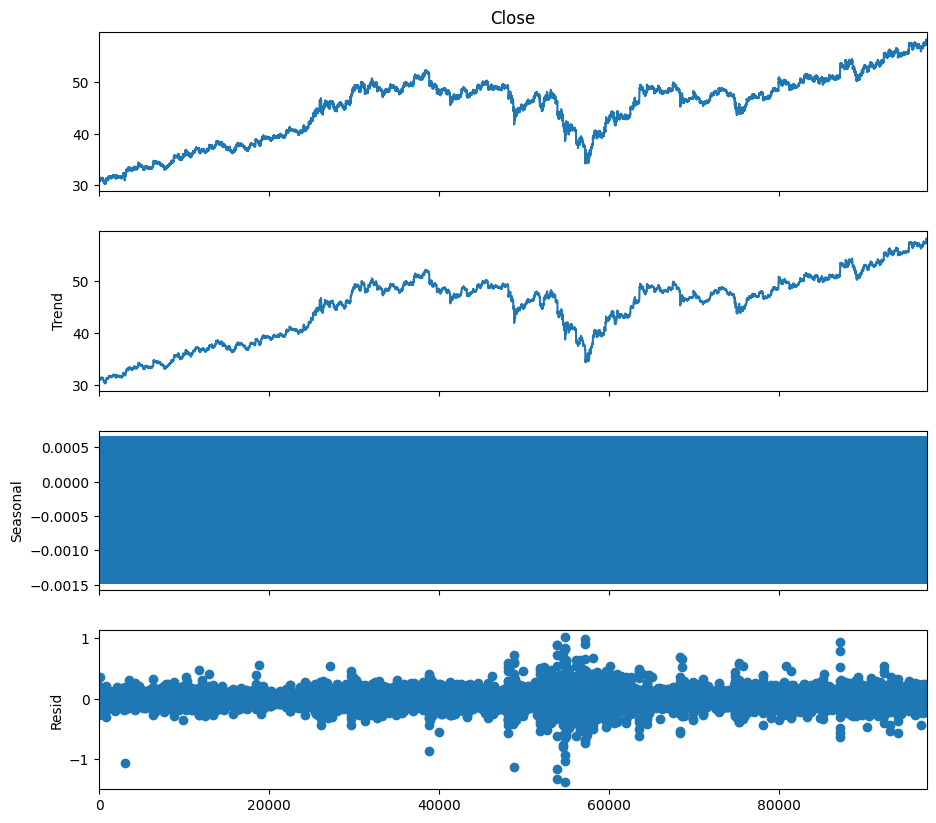

In [520]:
decomposition_multi = seasonal_decompose(fpt['Close'], model='additive', period=12)
fig = decomposition_multi.plot()
fig.set_size_inches((10, 9))
plt.show()

Candlestick chart with SMA indicators

In [521]:
#Simple Moving Average
def SMA(data, period=30, column='Close'):
  return data[column].rolling(window=period).mean()

# candlestick chart
def candlestick_chart(data_stock):
  data_stock['SMA_7'] = SMA(data_stock, period=7)
  data_stock['SMA_30'] = SMA(data_stock, period=30)
  data_stock['SMA_90'] = SMA(data_stock, period=90)
  data_stock['SMA_180'] = SMA(data_stock, period=180)
  fig = go.Figure(
      data=[
          go.Candlestick(x=data_stock.index, open=data_stock['Open'], high=data_stock['High'], low=data_stock['Low'], close=data_stock['Close']),
          go.Line(x=data_stock.index, y=data_stock['SMA_7'], line=dict(color='blue', width=1), name='SMA7'),
          go.Line(x=data_stock.index, y=data_stock['SMA_30'], line=dict(color='green', width=1), name='SMA30'),
          go.Line(x=data_stock.index, y=data_stock['SMA_90'], line=dict(color='orange', width=1), name='SMA90'),
          go.Line(x=data_stock.index, y=data_stock['SMA_180'], line=dict(color='red', width=1), name='SMA180')
      ]
  )
  fig.update_layout(xaxis_rangeslider_visible=False)
  # update size
  fig.update_layout(height=750, width=1500)
  fig.show()

candlestick_chart(pnj_eda)


Correlation matrix with heatmap

Volume chart

In [522]:
def volume_chart(data_stock):
  fig = go.Figure()
  colors = []
  for i in range(len(data_stock['Close'])):
      if i != 0:
          if data_stock['Close'][i] > data_stock['Close'][i-1]:
              colors.append('red')
          else:
              colors.append('green')
      else:
          colors.append('green')
  fig.add_trace(
      go.Bar(x=data_stock.index, y=data_stock['Volume'], marker_color=colors, name='Volume')
  )
  fig.update_layout(height=750, width=1500)
  fig.show()

volume_chart(pnj_eda)

RSI

Text(0.5, 1.0, 'RSI')

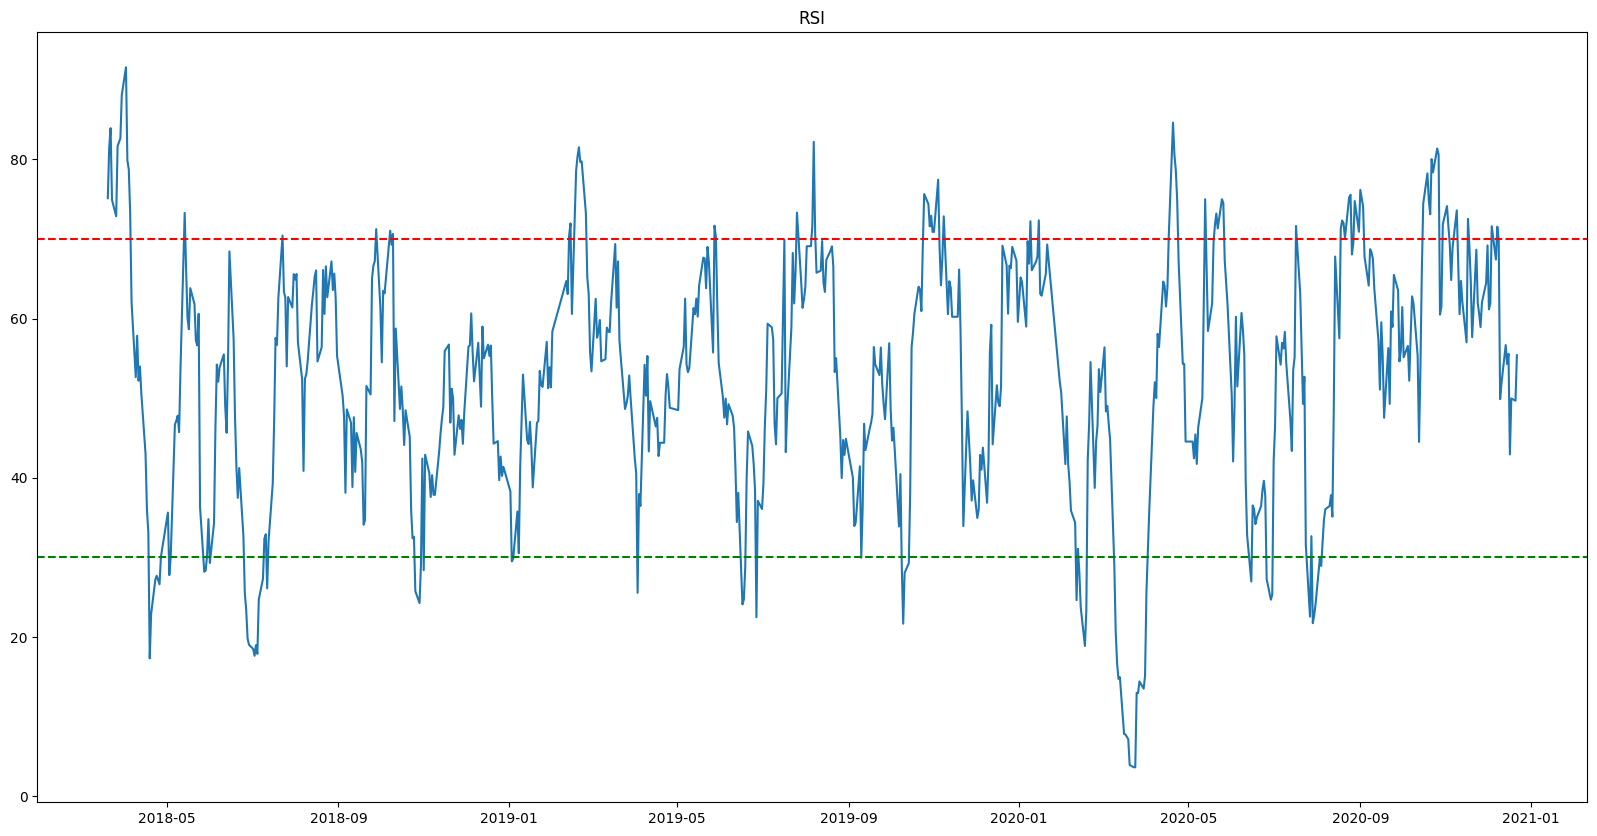

In [523]:
def RSI(series, period=14):
    delta = series.diff()
    delta = delta[1:]

    up, down = delta.clip(lower=0), delta.clip(upper=0).abs()

    roll_up = up.rolling(window=period).mean()
    roll_down = down.rolling(window=period).mean()

    RS = roll_up / roll_down
    RSI = 100 - (100 / (1.0 + RS))

    RSI[:] = np.select([roll_down == 0, roll_up == 0], [100, 0], default=RSI)
    RSI.name    = 'RSI'

    valid_RSI   = RSI[RSI.notnull()]

    return valid_RSI

RSI = RSI(pnj_eda.Close)

# draw RSI with matplotlib

plt.figure(figsize=(20, 10))
plt.plot(RSI)
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.title('RSI')

Return chart

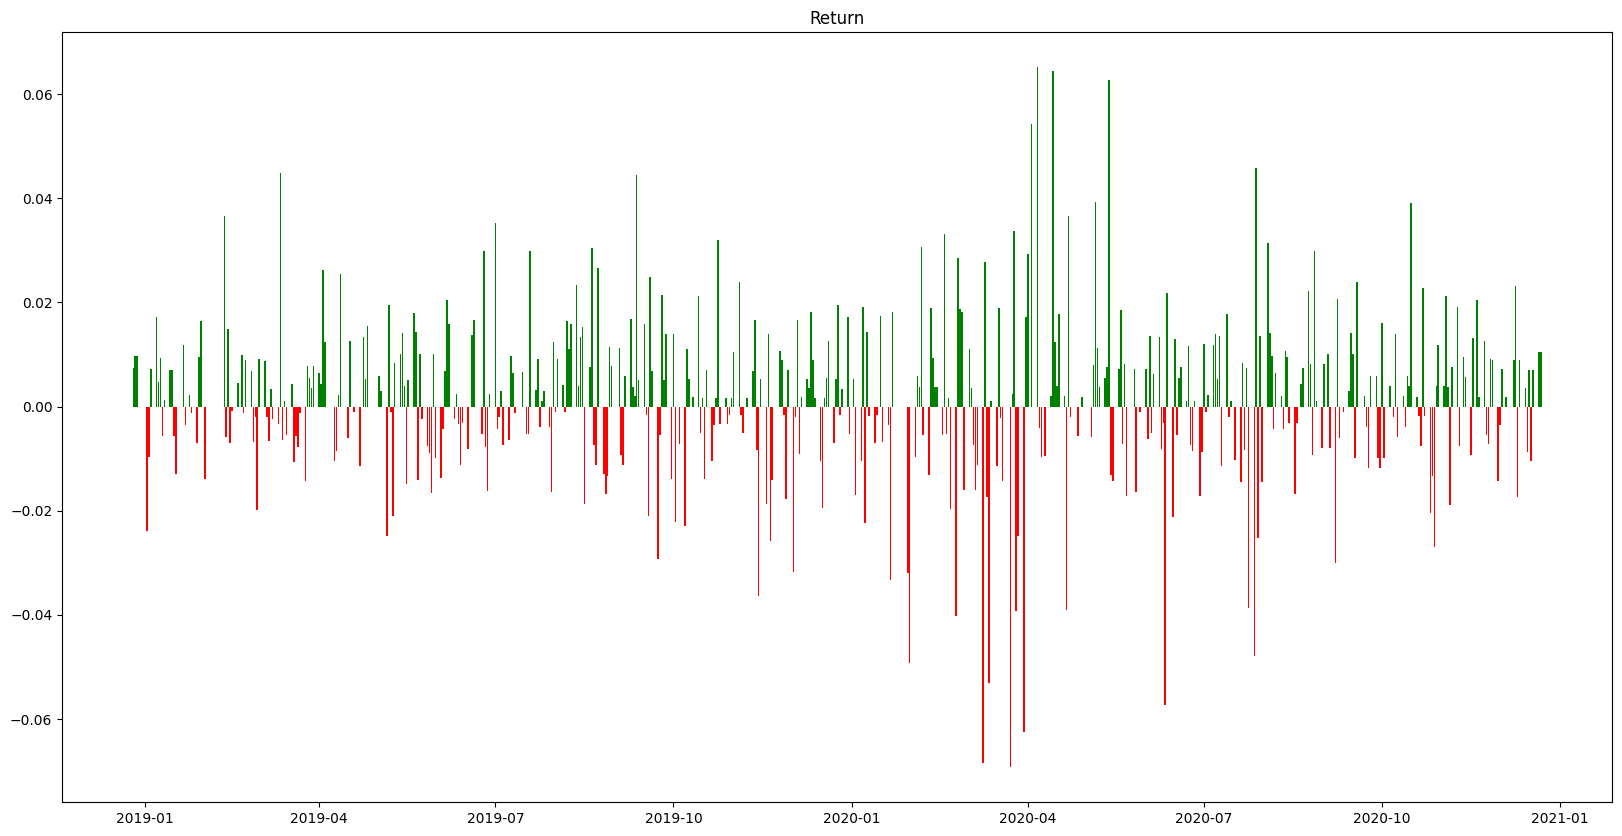

In [524]:
def stock_returns(data):
  data['Return'] = data['Close'].pct_change()
  plt.figure(figsize=(20, 10))
  color = ['green' if x > 0 else 'red' for x in data['Return']]
  plt.bar(data.index, data['Return'], color=color)
  plt.title('Return')
  plt.show()

stock_returns(fpt_eda)

Cumulative return chart

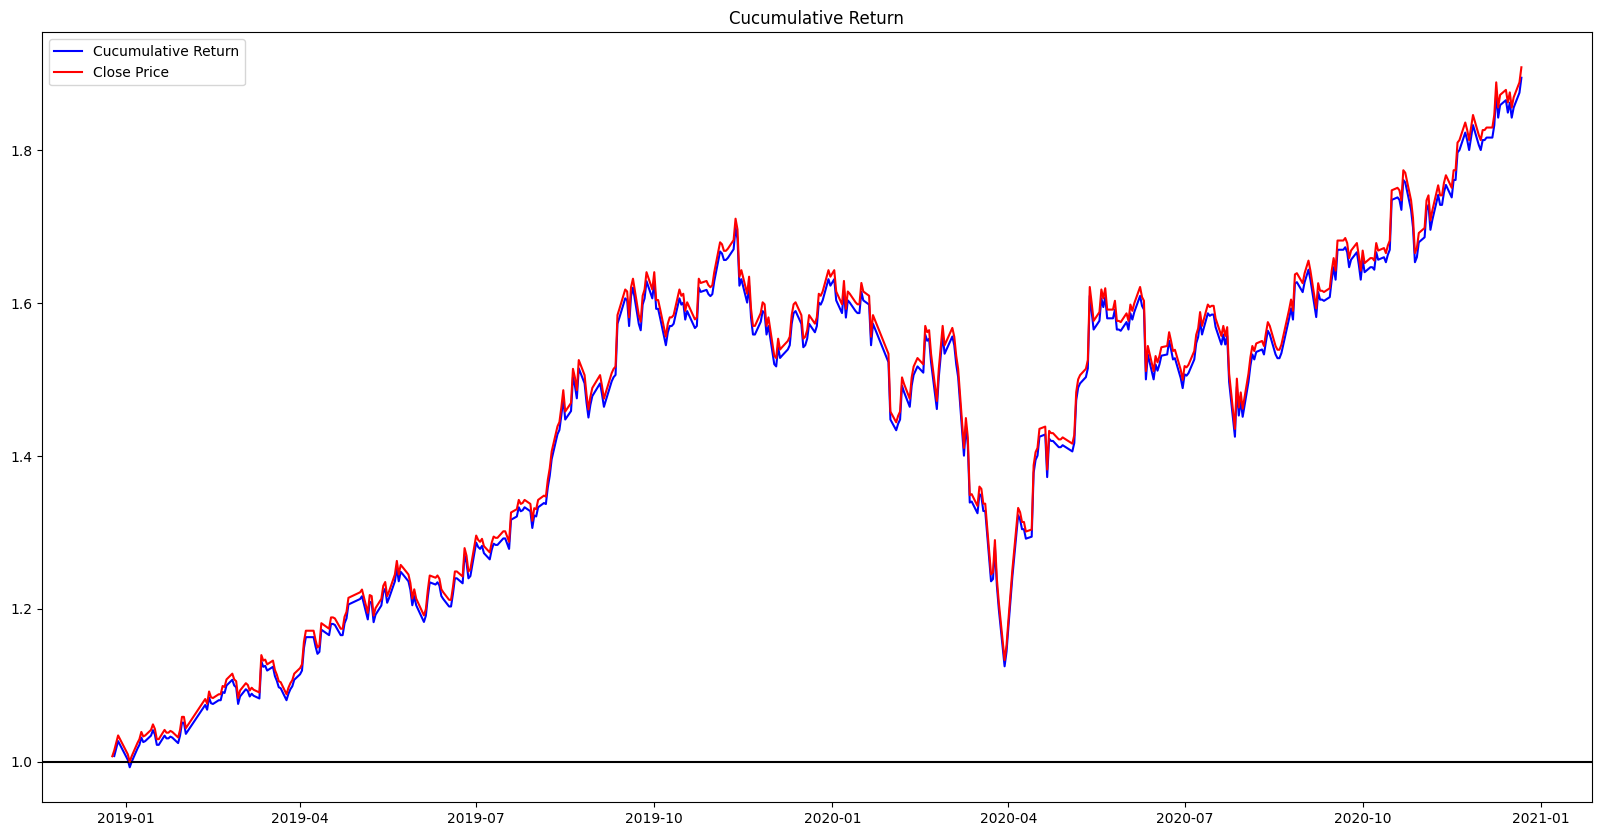

In [525]:
def cumulative_return(data):
  data['Cucumulative Return'] = (1 + data['Return']).cumprod()

  # draw cumulative return with matplotlib

  plt.figure(figsize=(20, 10))
  plt.plot(data['Cucumulative Return'], color='b', label='Cucumulative Return')
  plt.axhline(1, color='black', linestyle='-')
  # plot close price scale down with min-max
  plt.plot(data['Close'] / data['Close'].min(), color='r', label='Close Price')
  plt.legend()
  plt.title('Cucumulative Return')
  plt.show()

cumulative_return(fpt_eda)

# Modeling and prediction

## Preparing data

Convert date from string to date format

In [526]:

fpt['Date/Time'] = pd.to_datetime(fpt['Date/Time']).apply(lambda x: x.date())
msn['Date/Time'] = pd.to_datetime(msn['Date/Time']).apply(lambda x: x.date())
pnj['Date/Time'] = pd.to_datetime(pnj['Date/Time']).apply(lambda x: x.date())
vic['Date/Time'] = pd.to_datetime(vic['Date/Time']).apply(lambda x: x.date())

fpt=group_stocks_by_day(fpt)
msn=group_stocks_by_day(msn)
pnj=group_stocks_by_day(pnj)
vic=group_stocks_by_day(vic)

In [527]:
fpt.reset_index(inplace=True)
msn.reset_index(inplace=True)
pnj.reset_index(inplace=True)
vic.reset_index(inplace=True)

In [528]:
fpt.head()

,Date/Time,Open,High,Low,Close,Volume
0,2018-12-25,30.89,30.89,30.59,30.66,84960
1,2018-12-26,31.04,31.22,30.89,30.89,333590
2,2018-12-27,31.41,31.52,31.19,31.19,454860
3,2018-12-28,31.34,31.49,31.19,31.49,387170
4,2019-01-02,31.19,31.45,30.70,30.74,459120


In [529]:
fpt.sort_values(by='Date/Time', inplace=True)
msn.sort_values(by='Date/Time', inplace=True)
pnj.sort_values(by='Date/Time', inplace=True)
vic.sort_values(by='Date/Time', inplace=True)
fpt.head()

,Date/Time,Open,High,Low,Close,Volume
0,2018-12-25,30.89,30.89,30.59,30.66,84960
1,2018-12-26,31.04,31.22,30.89,30.89,333590
2,2018-12-27,31.41,31.52,31.19,31.19,454860
3,2018-12-28,31.34,31.49,31.19,31.49,387170
4,2019-01-02,31.19,31.45,30.70,30.74,459120


In [530]:
close_fpt = fpt[['Date/Time','Close']]
close_msn = msn[['Date/Time','Close']]
close_pnj = pnj[['Date/Time','Close']]
close_vic = vic[['Date/Time','Close']]
print("Shape of close fpt dataframe:", close_fpt.shape)
print("Shape of close msn dataframe:", close_msn.shape)
print("Shape of close pnj dataframe:", close_pnj.shape)
print("Shape of close vic dataframe:", close_vic.shape)

Shape of close fpt dataframe: (499, 2)
Shape of close msn dataframe: (748, 2)
Shape of close pnj dataframe: (709, 2)
Shape of close vic dataframe: (548, 2)


Get the duration of dataset

In [531]:
stocks = [fpt,msn,pnj,vic]
for i in stocks:
    # In tên của DataFrame
    print([name for name in globals() if globals()[name] is i][0])
    print("Starting date: ", i.iloc[0][0])
    print("Ending date: ", i.iloc[-1][0])
    print("Duration: ", i.iloc[-1][0] - i.iloc[0][0])
    print()

fpt
Starting date:  2018-12-25
Ending date:  2020-12-22
Duration:  728 days, 0:00:00

msn
Starting date:  2017-12-25
Ending date:  2020-12-22
Duration:  1093 days, 0:00:00

pnj
Starting date:  2018-02-28
Ending date:  2020-12-22
Duration:  1028 days, 0:00:00

vic
Starting date:  2018-10-17
Ending date:  2020-12-22
Duration:  797 days, 0:00:00



In [532]:
close_fpt_df = fpt[['Date/Time','Close']]
close_msn_df = msn[['Date/Time','Close']]
close_pnj_df = pnj[['Date/Time','Close']]
close_vic_df = vic[['Date/Time','Close']]

print("Shape of close fpt dataframe:", close_fpt_df.shape)
print("Shape of close msn dataframe:", close_msn_df.shape)
print("Shape of close pnj dataframe:", close_pnj_df.shape)
print("Shape of close vic dataframe:", close_vic_df.shape)

close_fpt_stock = close_fpt_df.copy()
close_msn_stock = close_msn_df.copy()
close_pnj_stock = close_pnj_df.copy()
close_vic_stock = close_vic_df.copy()

Shape of close fpt dataframe: (499, 2)
Shape of close msn dataframe: (748, 2)
Shape of close pnj dataframe: (709, 2)
Shape of close vic dataframe: (548, 2)


In [533]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

## Building a prediction model for FPT stock prices (GRU)

In [534]:
# Data normalization
del close_fpt_df['Date/Time']
scaler=MinMaxScaler(feature_range=(0,1))
close_fpt_df=scaler.fit_transform(np.array(close_fpt_df).reshape(-1,1))
print(close_fpt_df.shape)

#Split data
training_size=int(len(close_fpt_df)*0.7)
test_size=len(close_fpt_df)-training_size
train_data,test_data=close_fpt_df[0:training_size,:],close_fpt_df[training_size:len(close_fpt_df),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

#Create new dataset according to requirement of time-series prediction
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

# reshape input to be [samples, time steps, features]
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

(499, 1)
train_data:  (349, 1)
test_data:  (150, 1)
X_train:  (318, 30)
y_train:  (318,)
X_test:  (119, 30)
y_test (119,)
X_train:  (318, 30, 1)
X_test:  (119, 30, 1)


In [535]:
model=Sequential()
model.add(GRU(128,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(128,return_sequences=True))
model.add(GRU(64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,batch_size=64,verbose=1)

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_36 (GRU)                         │ (None, 30, 128)             │          50,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_37 (GRU)                         │ (None, 30, 128)             │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_38 (GRU)                         │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 186,689 (729.25 KB)

 Trainable params: 186,689 (729.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.1424 - val_loss: 0.0209
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0323 - val_loss: 0.0519
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0233 - val_loss: 0.0138
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - val_loss: 0.0017
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0099 - val_loss: 0.0140
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0091 - val_loss: 0.0068
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0076 - val_loss: 0.0015
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0076 - val_loss: 0.0091
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0077 - val_loss: 0.0033
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0065 - val_loss: 0.0012
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0054 - val_loss: 0.0030
Epoch 12/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0060 - val_loss: 0.0030


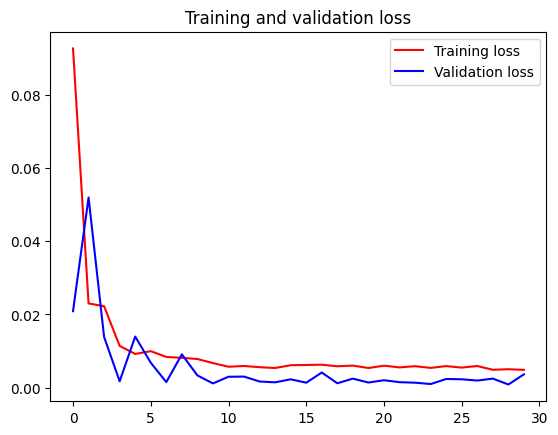

<Figure size 640x480 with 0 Axes>

In [536]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()


Preditction

In [537]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


((318, 1), (119, 1))

Transform back to original form

In [538]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

Model evaluation with MSE, RMSE, MAE, and R2 score

In [539]:
print("Train data: ")
print("RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("MSE: ", mean_squared_error(original_ytrain,train_predict))
print("MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("R2 score:", r2_score(original_ytrain, train_predict))
print("\n")
print("Test data: ")
print("RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("MSE: ", mean_squared_error(original_ytest,test_predict))
print("MAE: ", mean_absolute_error(original_ytest,test_predict))
print("R2 score:", r2_score(original_ytest, test_predict))

Train data: 
RMSE:  1.2700913101584868
MSE:  1.6131319361401013
MAE:  1.0041373098121495
R2 score: 0.94822682580976


Test data: 
RMSE:  1.6685381717677092
MSE:  2.78401963064593
MAE:  1.5174356925387347
R2 score: 0.7555604455063909


Plot comparision original stock price vs predicted price

In [540]:
#train predictions
look_back=time_step
trainPredictPlot = np.empty_like(close_fpt_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

#test predictions
testPredictPlot = np.empty_like(close_fpt_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_fpt_df)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])
# plot
plotdf = pd.DataFrame({'Date/Time': close_fpt_stock['Date/Time'],
                       'original_close': close_fpt_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date/Time'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (499, 1)
Test predicted data:  (499, 1)


## Building a prediction model for MSN stock prices(GRU)

In [541]:
#Data Normalization
del close_msn_df['Date/Time']
scaler=MinMaxScaler(feature_range=(0,1))
close_msn_df=scaler.fit_transform(np.array(close_msn_df).reshape(-1,1))
print(close_msn_df.shape)

#slipt data
training_size=int(len(close_msn_df)*0.7)
test_size=len(close_msn_df)-training_size
train_data,test_data=close_msn_df[0:training_size,:],close_msn_df[training_size:len(close_msn_df),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)


time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

# reshape input to be [samples, time steps, features]
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

(748, 1)
train_data:  (523, 1)
test_data:  (225, 1)
X_train:  (492, 30)
y_train:  (492,)
X_test:  (194, 30)
y_test (194,)
X_train:  (492, 30, 1)
X_test:  (194, 30, 1)


In [542]:
model=Sequential()
model.add(GRU(128,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(128,return_sequences=True))
model.add(GRU(64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,batch_size=64,verbose=1)

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_39 (GRU)                         │ (None, 30, 128)             │          50,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_40 (GRU)                         │ (None, 30, 128)             │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_41 (GRU)                         │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 186,689 (729.25 KB)

 Trainable params: 186,689 (729.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.1596 - val_loss: 0.0132
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0185 - val_loss: 0.0074
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0124 - val_loss: 0.0085
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095 - val_loss: 0.0055
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0083 - val_loss: 0.0043
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0081 - val_loss: 0.0028
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0077 - val_loss: 0.0023
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0072 - val_loss: 0.0022
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0075 - val_loss: 0.0022
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0064 - val_loss: 0.0022
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0058 - val_loss: 0.0021
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0063 - val_loss: 0.0024
E

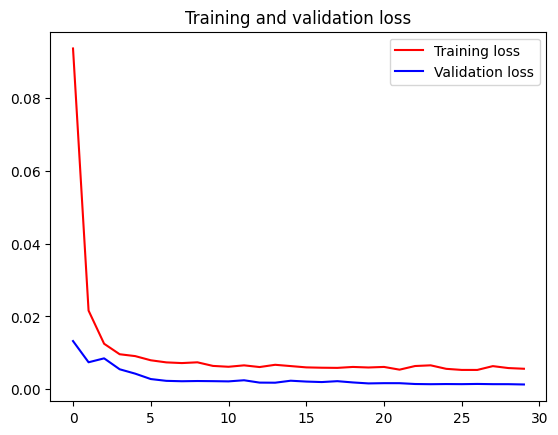

<Figure size 640x480 with 0 Axes>

In [543]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()


Preditction

In [544]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


((492, 1), (194, 1))

Transform back to original form

In [545]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

Model evaluation

In [546]:
print("Train data: ")
print("RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("MSE: ", mean_squared_error(original_ytrain,train_predict))
print("MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("R2 score:", r2_score(original_ytrain, train_predict))
print("\n")
print("Test data: ")
print("RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("MSE: ", mean_squared_error(original_ytest,test_predict))
print("MAE: ", mean_absolute_error(original_ytest,test_predict))
print("R2 score:", r2_score(original_ytest, test_predict))

Train data: 
RMSE:  2.0571025034897232
MSE:  4.231670709863686
MAE:  1.4797785239491037
R2 score: 0.964014850202052


Test data: 
RMSE:  2.3518435560059143
MSE:  5.531168111926545
MAE:  1.5166785588215301
R2 score: 0.9660634568087675


Plot comparision original stock price vs predicted price

In [547]:
#train predictions
look_back=time_step
trainPredictPlot = np.empty_like(close_msn_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

#test predictions
testPredictPlot = np.empty_like(close_msn_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(msn)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])
# plot
plotdf = pd.DataFrame({'Date/Time': close_msn_stock['Date/Time'],
                       'original_close': close_msn_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date/Time'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (748, 1)
Test predicted data:  (748, 1)


## Building a prediction model for PNJ stock prices(LSTM)

In [548]:
#Data Normalization
del close_pnj_df['Date/Time']
scaler=MinMaxScaler(feature_range=(0,1))
close_pnj_df=scaler.fit_transform(np.array(close_pnj_df).reshape(-1,1))
print(close_pnj_df.shape)

#slipt data
training_size=int(len(close_pnj_df)*0.7)
test_size=len(close_pnj_df)-training_size
train_data,test_data=close_pnj_df[0:training_size,:],close_pnj_df[training_size:len(close_pnj_df),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)


time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

# reshape input to be [samples, time steps, features]
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

(709, 1)
train_data:  (496, 1)
test_data:  (213, 1)
X_train:  (465, 30)
y_train:  (465,)
X_test:  (182, 30)
y_test (182,)
X_train:  (465, 30, 1)
X_test:  (182, 30, 1)


In [549]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(time_step,1)))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,batch_size=64,verbose=1)

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_50 (LSTM)                       │ (None, 30, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_51 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.1312 - val_loss: 0.0038
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0139 - val_loss: 0.0051
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0086 - val_loss: 0.0037
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0062 - val_loss: 0.0051
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0057 - val_loss: 0.0039
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0061 - val_loss: 0.0040
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0050 - val_loss: 0.0036
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0046 - val_loss: 0.0037
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0046 - val_loss: 0.0031
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0044 - val_loss: 0.0031
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0045 - val_loss: 0.0032
E

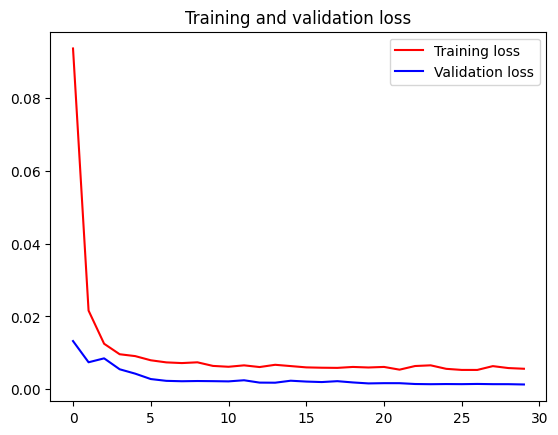

<Figure size 640x480 with 0 Axes>

In [550]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()


Preditction

In [551]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


((465, 1), (182, 1))

Transform back to original form

In [552]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

Model evaluation

In [553]:
print("Train data: ")
print("RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("MSE: ", mean_squared_error(original_ytrain,train_predict))
print("MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("R2 score:", r2_score(original_ytrain, train_predict))
print("\n")
print("Test data: ")
print("RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("MSE: ", mean_squared_error(original_ytest,test_predict))
print("MAE: ", mean_absolute_error(original_ytest,test_predict))
print("R2 score:", r2_score(original_ytest, test_predict))

Train data: 
RMSE:  2.988546551398946
MSE:  8.931410489878534
MAE:  2.1563806191721273
R2 score: 0.8026588278675076


Test data: 
RMSE:  2.8208564016464317
MSE:  7.957230838709655
MAE:  2.1662775689428986
R2 score: 0.8341579262792951


Plot comparision original stock price vs predicted price

In [554]:
#train predictions
look_back=time_step
trainPredictPlot = np.empty_like(close_pnj_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

#test predictions
testPredictPlot = np.empty_like(close_pnj_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(pnj)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])
# plot
plotdf = pd.DataFrame({'Date/Time': close_pnj_stock['Date/Time'],
                       'original_close': close_pnj_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date/Time'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (709, 1)
Test predicted data:  (709, 1)


## Building a prediction model for VIC stock prices (LSTM)

In [555]:
#Data Normalization
del close_vic_df['Date/Time']
scaler=MinMaxScaler(feature_range=(0,1))
close_vic_df=scaler.fit_transform(np.array(close_vic_df).reshape(-1,1))
print(close_vic_df.shape)

#slipt data
training_size=int(len(close_vic_df)*0.7)
test_size=len(close_vic_df)-training_size
train_data,test_data=close_vic_df[0:training_size,:],close_vic_df[training_size:len(close_vic_df),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)


time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

# reshape input to be [samples, time steps, features]
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

(548, 1)
train_data:  (383, 1)
test_data:  (165, 1)
X_train:  (352, 30)
y_train:  (352,)
X_test:  (134, 30)
y_test (134,)
X_train:  (352, 30, 1)
X_test:  (134, 30, 1)


In [556]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(time_step,1)))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,batch_size=64,verbose=1)

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_52 (LSTM)                       │ (None, 30, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_53 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.4037 - val_loss: 0.0402
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0563 - val_loss: 0.0053
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0294 - val_loss: 0.0047
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0106 - val_loss: 0.0219
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0131 - val_loss: 0.0049
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0125 - val_loss: 0.0080
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0091 - val_loss: 0.0116
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - val_loss: 0.0055
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0089 - val_loss: 0.0076
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0074 - val_loss: 0.0054
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0078 - val_loss: 0.0049
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0079 - val_loss: 0.0048
E

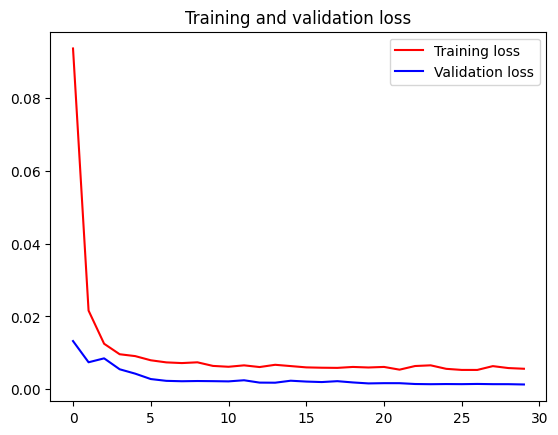

<Figure size 640x480 with 0 Axes>

In [557]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()


Preditction

In [558]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


((352, 1), (134, 1))

Transform back to original form

In [559]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

Model evaluation

In [560]:
print("Train data: ")
print("RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("MSE: ", mean_squared_error(original_ytrain,train_predict))
print("MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("R2 score:", r2_score(original_ytrain, train_predict))
print("\n")
print("Test data: ")
print("RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("MSE: ", mean_squared_error(original_ytest,test_predict))
print("MAE: ", mean_absolute_error(original_ytest,test_predict))
print("R2 score:", r2_score(original_ytest, test_predict))

Train data: 
RMSE:  3.5667391836593465
MSE:  12.721628404250943
MAE:  2.1939148426055906
R2 score: 0.8619440692129025


Test data: 
RMSE:  2.4990338663355587
MSE:  6.245170265092051
MAE:  1.8876921354834706
R2 score: 0.8734310442322826


Plot comparision original stock price vs predicted price

In [561]:
#train predictions
look_back=time_step
trainPredictPlot = np.empty_like(close_vic_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

#test predictions
testPredictPlot = np.empty_like(close_vic_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(vic)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])
# plot
plotdf = pd.DataFrame({'Date/Time': close_vic_stock['Date/Time'],
                       'original_close': close_vic_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date/Time'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (548, 1)
Test predicted data:  (548, 1)
